In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-sales-prediction/BA Assignment Walmart Sales.csv


In [73]:
df=pd.read_csv("/kaggle/input/walmart-sales-prediction/BA Assignment Walmart Sales.csv")
print(df.head)

<bound method NDFrame.head of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      A  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      B     Yangon        Member    Male   
4    373-73-7910      C     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      A  Naypyitaw        Normal    Male   
996  303-96-2227      A   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      B     Yangon        Normal    Male   
999  849-09-3807      C     Yangon        Member  Female   

               Product line  Unit price  Quantity       Date   Time  \
0         Health and beauty       74.69         7   1/5/2019  13:08   
1    Electronic accessories       15.28         5   3/8/2019  10:29   
2        Home and lifestyle       46

In [74]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46,Ewallet,6.2
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22,Cash,7.7
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33,Cash,4.1


In [76]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [77]:
#checking for string and numerical data
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']
Numerical columns : ['Unit price', 'Quantity', 'Rating']


In [79]:
#checking for unique values
df[cat_col].nunique()

Invoice ID       1000
Branch              3
City                3
Customer type       2
Gender              2
Product line        6
Date               89
Time              506
Payment             3
dtype: int64

<Axes: >

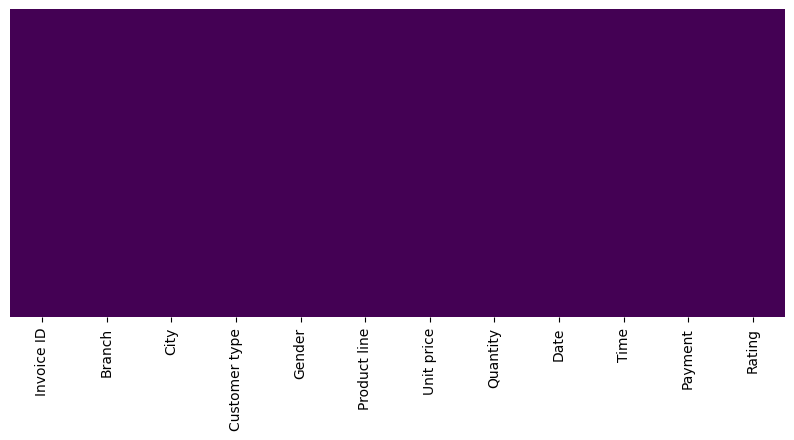

In [80]:
# heatmap to check the missing value
plt.figure(figsize =(10, 4))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [81]:
#getting percentage of missing data
round((df.isnull().sum()/df.shape[0])*100,2)

Invoice ID       0.0
Branch           0.0
City             0.0
Customer type    0.0
Gender           0.0
Product line     0.0
Unit price       0.0
Quantity         0.0
Date             0.0
Time             0.0
Payment          0.0
Rating           0.0
dtype: float64

In [82]:

df['sales'] = df['Unit price']*df['Quantity']
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,5.3,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46,Ewallet,6.2,40.35
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16,Ewallet,4.4,973.80
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22,Cash,7.7,31.84
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33,Cash,4.1,65.82


<Figure size 640x480 with 0 Axes>

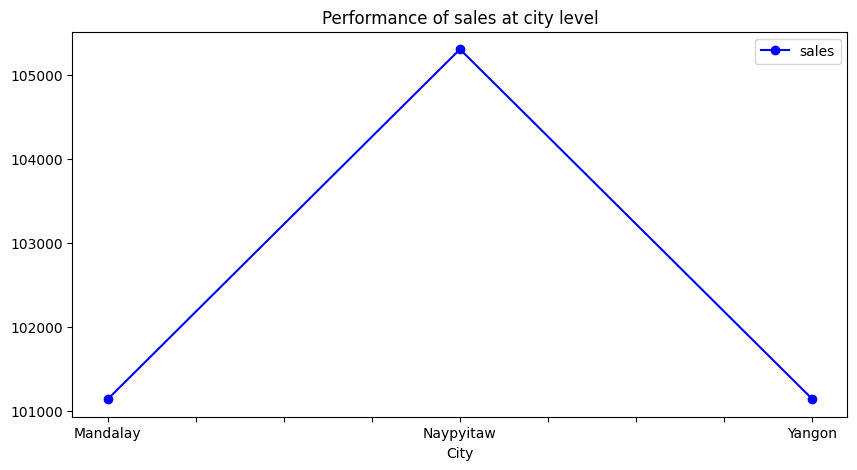

<Figure size 640x480 with 0 Axes>

In [83]:
#Line Graph to show performance of sales at city level
axis = df.groupby('City')[['sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'b')
axis.set_title('Performance of sales at city level')

plt.figure()


<Figure size 640x480 with 0 Axes>

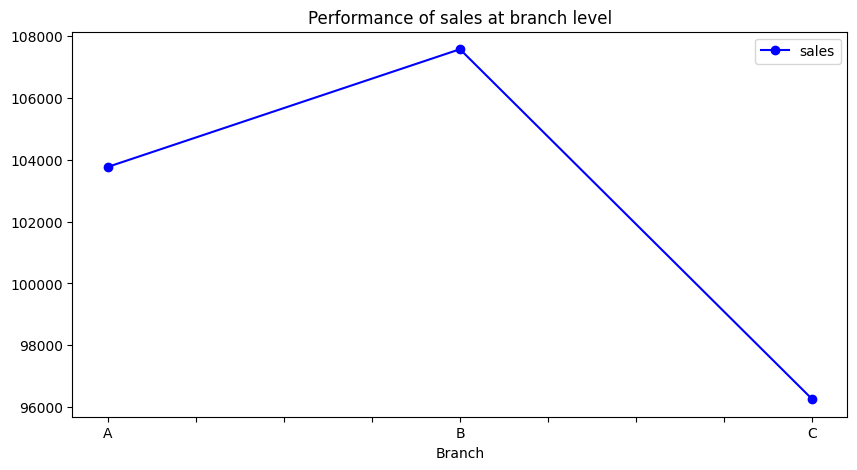

<Figure size 640x480 with 0 Axes>

In [84]:
#Line Graph to show performance sales at a branch level
axis = df.groupby('Branch')[['sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'b')
axis.set_title('Performance of sales at branch level')

plt.figure()


In [85]:
average_price = df.groupby('Branch')['Unit price'].mean()

# Print the average price at the branch
print(average_price)

Branch
A    54.360175
B    56.622412
C    56.072461
Name: Unit price, dtype: float64


In [87]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the date column
df['month'] = df['Date'].dt.strftime('%m')

# Print the dataframe
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,sales,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,13:08,Ewallet,9.1,522.83,01
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,10:29,Cash,9.6,76.40,03
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,13:23,Credit card,7.4,324.31,03
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,20:33,Ewallet,8.4,465.76,01
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,10:37,Ewallet,5.3,604.17,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2019-01-29,13:46,Ewallet,6.2,40.35,01
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,2019-03-02,17:16,Ewallet,4.4,973.80,03
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2019-02-09,13:22,Cash,7.7,31.84,02
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2019-02-22,15:33,Cash,4.1,65.82,02


In [ ]:
plt.plot(x, y, label = "line 1", linestyle="-") 
plt.plot(y, x, label = "line 2", linestyle="--") 

<Figure size 640x480 with 0 Axes>

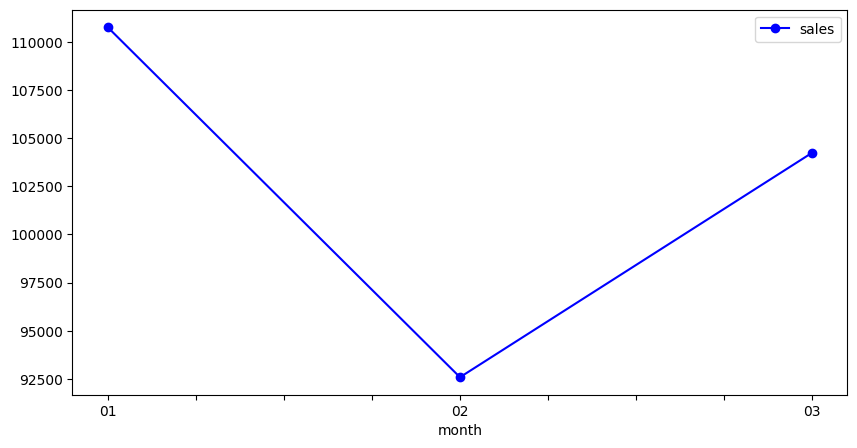

<Figure size 640x480 with 0 Axes>

In [94]:
#Line Graph ton show variation of runtime with time
axis = df.groupby('month')[['sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'b')
#axis = df.groupby('Production line')[['sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'r')
#axis.set_title('Variation of runtime over time')

plt.figure()